## MIM PML WS 23/24 - Abgabe Projekt 2
### by Merve Altuntaş (Matr.Nr. 203480) und Andrika Deeka Kapoor (Matr.Nr. 215127)

### 1. Import Statements

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

### 2. Data Preprocessing
#### 2.1 Loading data
Dataset information can be found [here](https://archive.ics.uci.edu/dataset/697/predict+students+dropout+and+academic+success)

In [11]:
# Loading the csv-file with pandas and defining the separator (;) to get individual columns
data = pd.read_csv('student_data.csv', sep=',')

# Display the first few rows
data.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


#### 2.2 Exploring data


In [3]:
data.describe()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.00000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,...,4000.000000,4000.00000,4000.00000,4000.000000,4000.000000,4000.000000,4000.00000,4000.000000,4000.000000,4000.000000
mean,1.180750,18.690750,1.724250,8869.913500,0.88750,4.584000,132.615850,1.865250,19.631750,22.418250,...,0.136250,0.53125,6.21425,8.030750,4.410500,10.201676,0.14950,11.559675,1.221725,-0.007977
std,0.610059,17.486697,1.307341,2035.481923,0.31602,10.269557,13.236954,6.804753,15.624345,15.280549,...,0.671043,1.87694,2.15859,3.925705,2.991024,5.229377,0.73945,2.673214,1.383045,2.271051
min,1.000000,1.000000,0.000000,33.000000,0.00000,1.000000,95.000000,1.000000,1.000000,1.000000,...,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.00000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,9085.000000,1.00000,1.000000,125.000000,1.000000,2.000000,3.000000,...,0.000000,0.00000,5.00000,6.000000,2.000000,10.750000,0.00000,9.400000,0.300000,-1.700000
50%,1.000000,17.000000,1.000000,9238.000000,1.00000,1.000000,133.100000,1.000000,19.000000,19.000000,...,0.000000,0.00000,6.00000,8.000000,5.000000,12.200000,0.00000,11.100000,1.400000,0.320000
75%,1.000000,39.000000,2.000000,9556.000000,1.00000,1.000000,140.000000,1.000000,37.000000,37.000000,...,0.000000,0.00000,7.00000,10.000000,6.000000,13.333333,0.00000,13.900000,2.600000,1.790000
max,6.000000,57.000000,9.000000,9991.000000,1.00000,43.000000,190.000000,109.000000,44.000000,44.000000,...,12.000000,19.00000,23.00000,28.000000,20.000000,17.714286,12.00000,16.200000,3.700000,3.510000


Missing values

In [ ]:
# Checking for missing values
missing_values = data.isnull()
missing_amount = missing_values.sum()
print("Missing values:\n", missing_values)
print("Amount of missing value in each column:\n", missing_amount)


Data types

In [ ]:
# Get the data type of all columns
column_types = data.dtypes
print("Data types of all columns:\n", column_types)


In [14]:
from sklearn.preprocessing import LabelEncoder

# 'Target' is the categorical column
target_column = 'Target'

# 0 - "dropout", 1 - "enrolled",  2 - "graduate"
category_order = ['Dropout', 'Enrolled', 'Graduate']

# converting categorical feature in numeric (integer)
label_encoder = LabelEncoder()
label_encoder.fit(category_order)

data[target_column] = label_encoder.transform(data[target_column])

# Display the transformed column
data[target_column].head()


0    0
1    2
2    0
3    2
4    2
Name: Target, dtype: int64

### 3. Feature correlation  
Here a random feature is introduced for feature selection. This random feature is correlated with the target variable. The correlation value is used as a threshold 'z' to filter out all features that have a correlation with the target variable less than or equal to 'z'.

/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:80: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


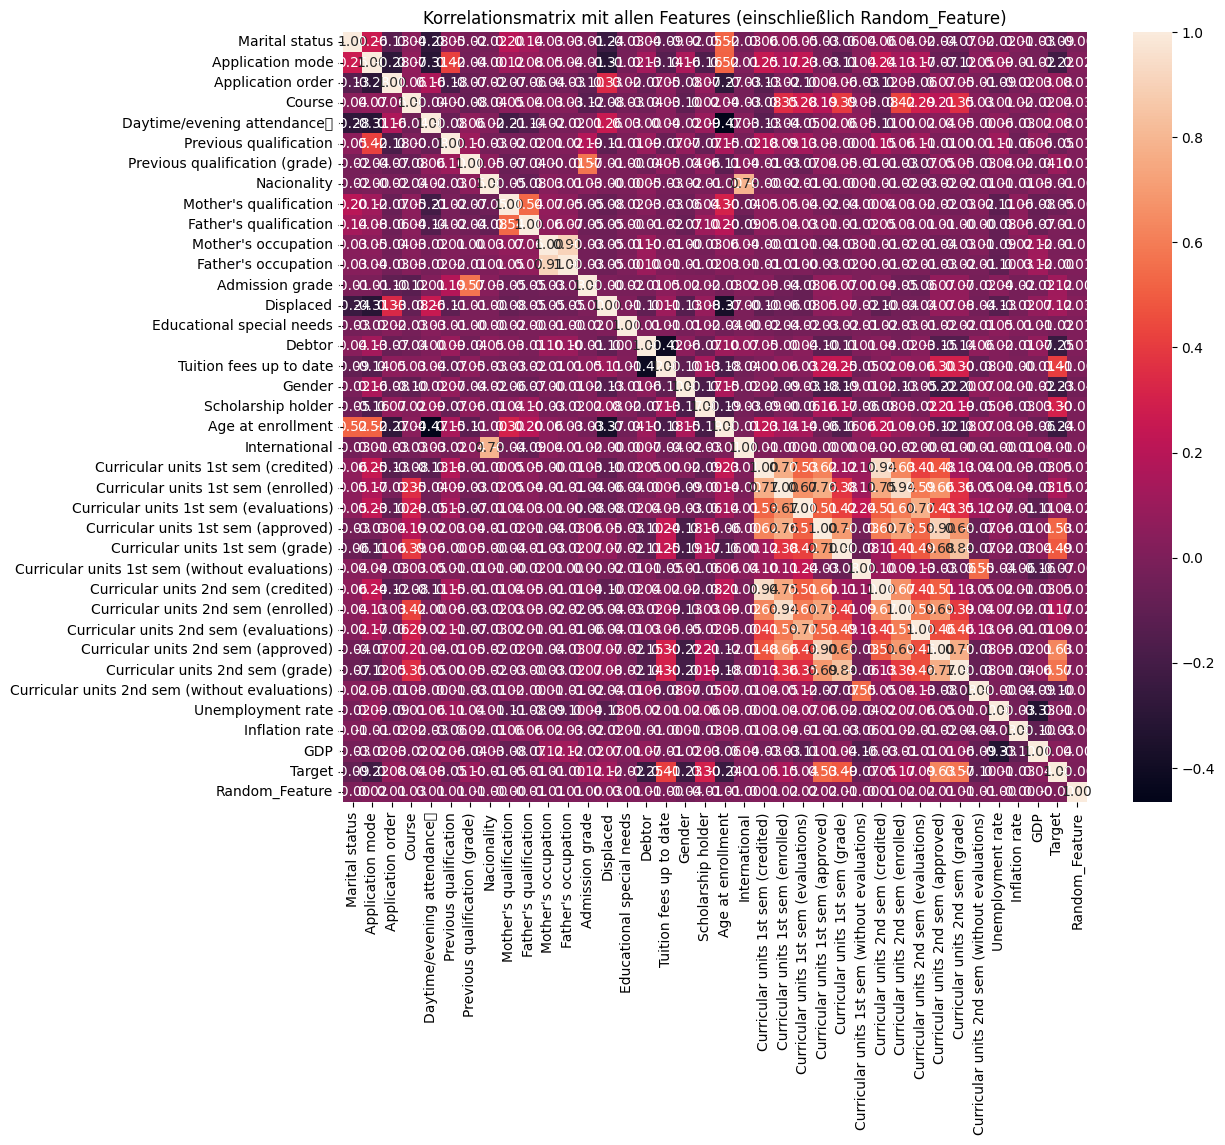

Entfernte Features aufgrund niedriger Korrelation zur Zielvariable:
['Marital status', 'Application mode', 'Previous qualification', 'Nacionality', "Mother's qualification", "Father's qualification", "Mother's occupation", "Father's occupation", 'Educational special needs', 'Debtor', 'Gender', 'Age at enrollment', 'Curricular units 1st sem (without evaluations)', 'Curricular units 2nd sem (without evaluations)', 'Inflation rate', 'Random_Feature']


/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:80: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


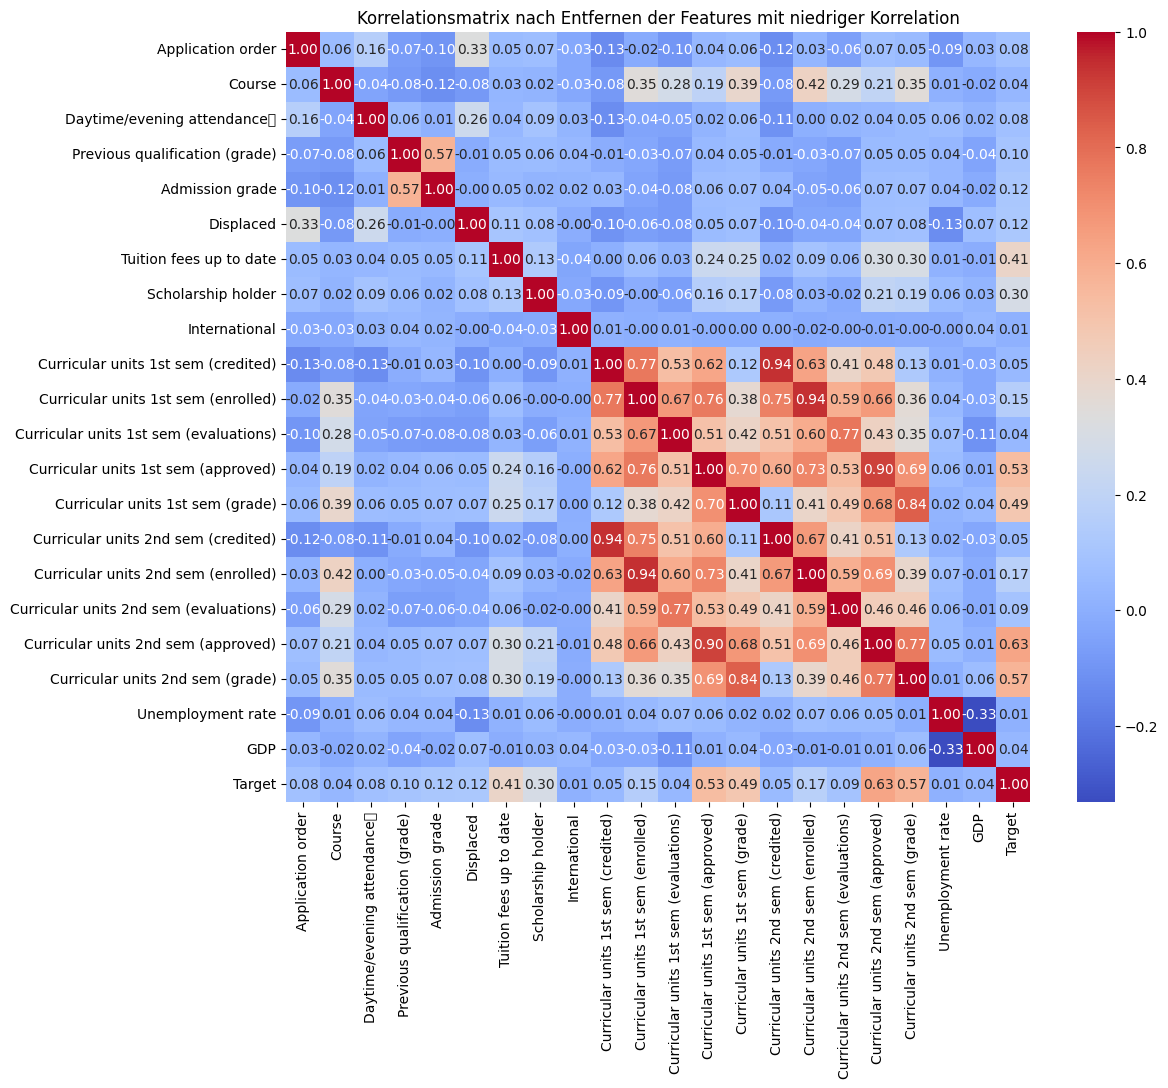

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Calculate the correlation matrix with all features and the random feature
corr_matrix_all = data.corr()

# Visualize the correlation matrix with all features
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix_all, annot=True, fmt='.2f')
plt.title("Korrelationsmatrix mit allen Features (einschließlich Random_Feature)")
plt.show()


np.random.seed(42)
data['Random_Feature'] = np.random.randn(data.shape[0])

# Calculating correlation matrix
corr_matrix = data.corr()

# correlation between 'Target' and 'Random_Feature' ('z')
z = corr_matrix.loc['Target','Random_Feature']

# Remove the features that have a correlation less than or equal to 'z' to the target variable
low_corr_features = corr_matrix.index[corr_matrix['Target'] <= z].tolist()

print("Entfernte Features aufgrund niedriger Korrelation zur Zielvariable:")
print(low_corr_features)

# Remove the 'Random_Feature' as it is no longer needed
data.drop(columns=['Random_Feature'], inplace=True)

# Remove features with low correlation to the target variable
data.drop(columns=low_corr_features, inplace=True, errors='ignore')

# Update X with the remaining features
X = data.drop('Target', axis=1)

# Calculation of the new correlation matrix after removing the features
new_corr_matrix = data.corr()

# Visualization of the new correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(new_corr_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title("Korrelationsmatrix nach Entfernen der Features mit niedriger Korrelation")
plt.show()



#### 2.3 Feature Engineering

**One-hot encoding**

Since many columns have categorical variables where each individual number has a different meaning, *one-hot encoding* was used to create a binary column for each category and returns a sparse matrix or dense array.

*Already one-hot-encoded:*
Daytime/evening attendance, Displaced, Educational special needs, Debtor, Tuition fees up to date, Gender, Scholarship holder, International

*Integer:*
Application order, Age at enrollment, Curricular units 1st sem (credited), Curricular units 1st sem (enrolled), Curricular units 1st sem (evaluations), Curricular units 1st sem (approved), Curricular units 1st sem (without evaluations), Curricular units 2nd sem (credited), Curricular units 2nd sem (enrolled), Curricular units 2nd sem (evaluations), Curricular units 2nd sem (approved), Curricular units 2nd sem (without evaluations)

*Float:*
Admission grade, Previous qualification (grade), Curricular units 1st sem (grade), Curricular units 2nd sem (grade), Unemployment rate, Inflation rate, GDP


In [18]:
# First define the categorical columns
categorical_columns = ['Course']

# Convert the categorical columns to the data type 'category'
data[categorical_columns] = data[categorical_columns].astype('category')

# Application of one-hot encoding to all categorical columns
data_encoded = pd.get_dummies(data, columns=categorical_columns, prefix=categorical_columns)

# Removing the original categorical columns
data = data.drop(categorical_columns, axis=1)

# Adding the one-hot coded columns to dataframe
data = pd.concat([data, data_encoded], axis=1)

# Replacing all True values with 1 and all False values with 0
data = data.replace({True: 1, False: 0})

# Checking for duplicate column names
duplicated_columns = data.columns[data.columns.duplicated()]

# Removing the duplicate columns
data = data.loc[:, ~data.columns.duplicated()]

data.head()


,Application order,Daytime/evening attendance\t,Previous qualification (grade),Admission grade,Displaced,Tuition fees up to date,Scholarship holder,International,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),...,Course_9130,Course_9147,Course_9238,Course_9254,Course_9500,Course_9556,Course_9670,Course_9773,Course_9853,Course_9991
0,5,1,122.0,127.3,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,160.0,142.5,1,0,0,0,0,6,...,0,0,0,1,0,0,0,0,0,0
2,5,1,122.0,124.8,1,0,0,0,0,6,...,0,0,0,0,0,0,0,0,0,0
3,2,1,122.0,119.6,1,1,0,0,0,6,...,0,0,0,0,0,0,0,1,0,0
4,1,0,100.0,141.5,0,1,0,0,0,6,...,0,0,0,0,0,0,0,0,0,0


**Normalizing numeric features (int, float) to fall between 0 and 1**

*Integer:*
Application order, Age at enrollment, Curricular units 1st sem (credited), Curricular units 1st sem (enrolled), Curricular units 1st sem (evaluations), Curricular units 1st sem (approved), Curricular units 1st sem (without evaluations), Curricular units 2nd sem (credited), Curricular units 2nd sem (enrolled), Curricular units 2nd sem (evaluations), Curricular units 2nd sem (approved), Curricular units 2nd sem (without evaluations)

*Float:*
Admission grade, Previous qualification (grade), Curricular units 1st sem (grade), Curricular units 2nd sem (grade), Unemployment rate, Inflation rate, GDP

In [20]:
from sklearn.preprocessing import MinMaxScaler

columns_to_normalize = ['Application order', 'Curricular units 1st sem (credited)',
                        'Curricular units 1st sem (enrolled)', 'Curricular units 1st sem (evaluations)',
                        'Curricular units 1st sem (approved)', 'Curricular units 2nd sem (credited)', 'Curricular units 2nd sem (enrolled)',
                        'Curricular units 2nd sem (evaluations)', 'Curricular units 2nd sem (approved)', 'Admission grade',
                        'Previous qualification (grade)', 'Curricular units 1st sem (grade)',
                        'Curricular units 2nd sem (grade)', 'Unemployment rate', 'GDP']

# Creating an instance of the StandardScaler
minmax_scaler = MinMaxScaler()

minmax_scaler.fit(data[columns_to_normalize])

data[columns_to_normalize] = minmax_scaler.transform(data[columns_to_normalize])

data.head()

,Application order,Daytime/evening attendance\t,Previous qualification (grade),Admission grade,Displaced,Tuition fees up to date,Scholarship holder,International,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),...,Course_9130,Course_9147,Course_9238,Course_9254,Course_9500,Course_9556,Course_9670,Course_9773,Course_9853,Course_9991
0,0.555556,1,0.284211,0.340000,1,1,0,0,0.0,0.00000,...,0,0,0,0,0,0,0,0,0,0
1,0.111111,1,0.684211,0.500000,1,0,0,0,0.0,0.26087,...,0,0,0,1,0,0,0,0,0,0
2,0.555556,1,0.284211,0.313684,1,0,0,0,0.0,0.26087,...,0,0,0,0,0,0,0,0,0,0
3,0.222222,1,0.284211,0.258947,1,1,0,0,0.0,0.26087,...,0,0,0,0,0,0,0,1,0,0
4,0.111111,0,0.052632,0.489474,0,1,0,0,0.0,0.26087,...,0,0,0,0,0,0,0,0,0,0


#### 2.5 Data augmentation

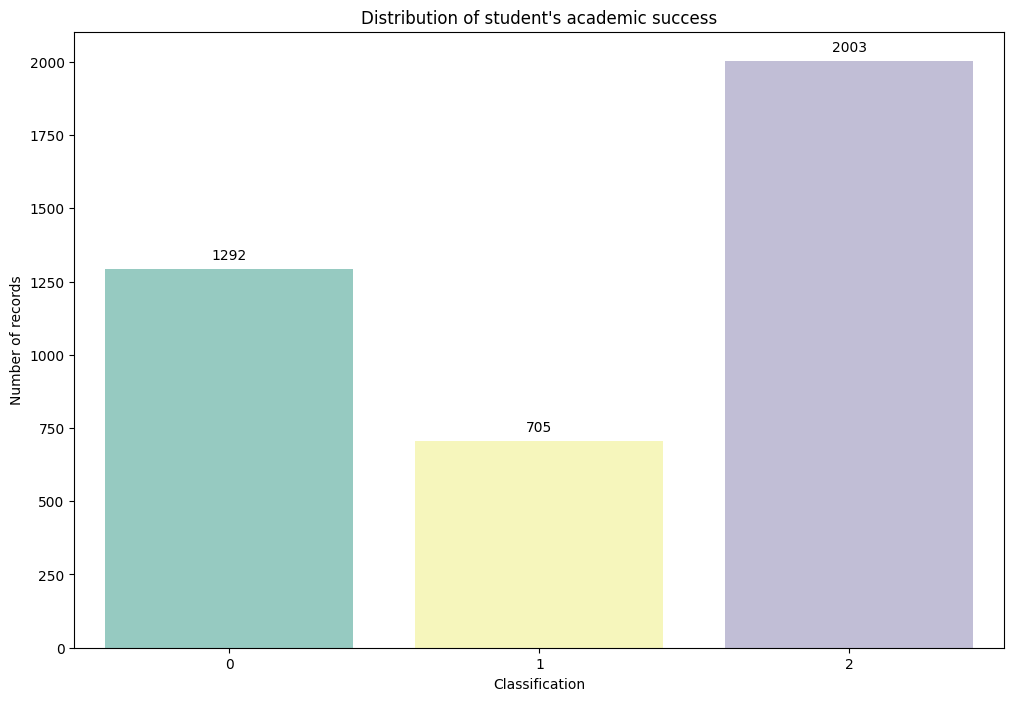

In [22]:
def plot_distribution(data):
    # boxplot
    plt.figure(figsize=(12, 8))
    ax = sns.countplot(x='Target', data=data, palette='Set3')

    # Change axis labeling
    ax.set(xlabel='Classification', ylabel='Number of records')

    # Write the number of elements to the bars
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', xytext=(0, 10), textcoords='offset points')

    # show diagram
    plt.title("Distribution of student's academic success")
    plt.show()


plot_distribution(data)

Here we can see an uneven distribution of the data
-> Using SMOTE for data augmentation for the 2 smallest target classes with "imbalanced-learn" from scikitlearn

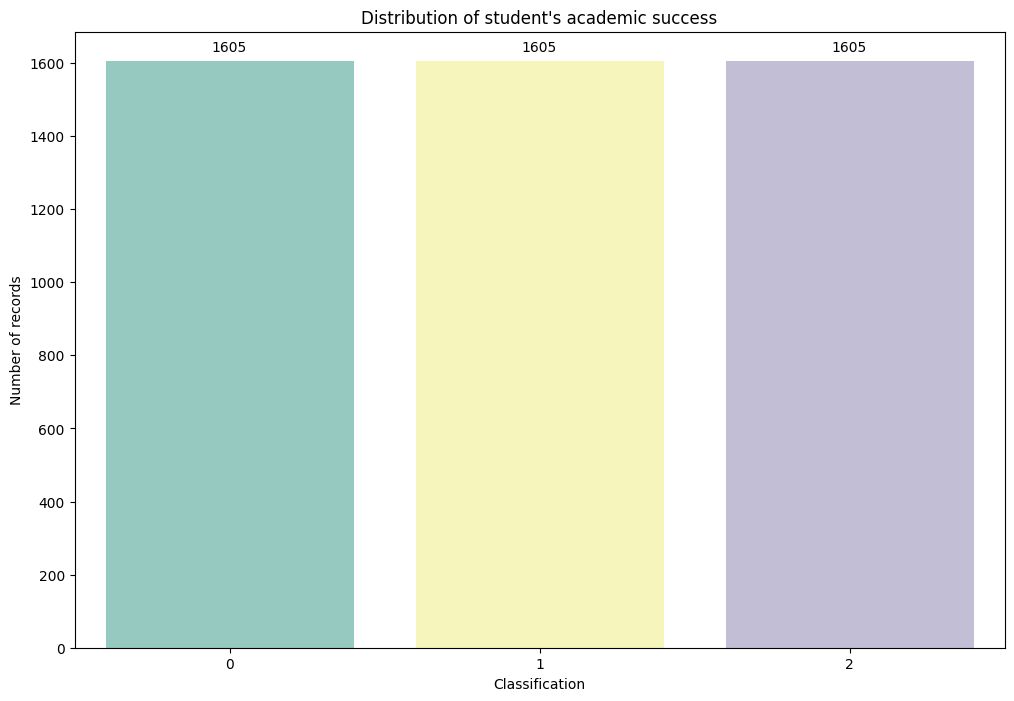

,Application order,Daytime/evening attendance\t,Previous qualification (grade),Admission grade,Displaced,Tuition fees up to date,Scholarship holder,International,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),...,Course_9147,Course_9238,Course_9254,Course_9500,Course_9556,Course_9670,Course_9773,Course_9853,Course_9991,Target
0,0.111111,1,0.263158,0.263158,0,1,0,0,0.100000,0.304348,...,0,0,0,0,0,0,0,0,0,2
1,0.111111,1,0.401053,0.157895,1,0,0,0,0.000000,0.217391,...,0,0,1,0,0,0,0,0,0,0
2,0.111111,0,0.473684,0.078947,0,1,1,0,0.000000,0.260870,...,0,0,0,0,0,0,0,0,0,2
3,0.111111,1,0.221053,0.169474,0,1,0,0,0.000000,0.260870,...,0,1,0,0,0,0,0,0,0,2
4,0.111111,1,0.401053,0.263158,0,1,0,0,0.000000,0.130435,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4810,0.111111,1,0.382436,0.382436,1,1,0,0,0.006657,0.223180,...,0,0,0,0,0,0,0,0,0,1
4811,0.111111,1,0.473684,0.473684,0,1,0,0,0.000000,0.260870,...,0,0,0,0,0,0,0,0,0,1
4812,0.111111,1,0.407941,0.510938,1,1,0,0,0.000000,0.217391,...,0,0,0,0,0,0,0,0,0,1
4813,0.111111,1,0.263158,0.197656,0,1,0,0,0.008575,0.224848,...,1,0,0,0,0,0,0,0,0,1


In [23]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd

# defining target column
target_column = "Target"

# Splitting the data into features and target
X = data.drop(columns=[target_column], axis=1)
y = data[target_column]

# split in train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Upsampling mit SMOTE for imbalanced classes
resample = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = resample.fit_resample(X_train, y_train)

# Combine features (X_train_resampled) and target variable (y_train_resampled) into a DataFrame
resampled_data = pd.DataFrame(X_train_resampled, columns=X.columns)
resampled_data[target_column] = y_train_resampled

plot_distribution(resampled_data)

resampled_data

### 3. Training four models

In [24]:
!pip install scikit-learn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler

# Define hyperparameter grids
rf_params = {
    'n_estimators': [50, 100, 300],
    'max_depth': [3, 5, 7],
    'max_features': [2, 4, 6, 8],
    'min_samples_split': [2, 4, 6]
}

knn_params = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

dt_params = {
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Remove the extra column from the training dataset
X_train_resampled = X_train_resampled.drop(columns='Target')


# Train models with GridSearchCV and display best parameters
nb_model = MultinomialNB()
nb_model.fit(X_train_resampled, y_train_resampled)

rf_grid = GridSearchCV(RandomForestClassifier(random_state=42), rf_params, cv=5, n_jobs=-1)
rf_grid.fit(X_train_resampled, y_train_resampled)
rf_model = rf_grid.best_estimator_
print("\nRandom Forest Best Parameters:", rf_grid.best_params_)

knn_grid = GridSearchCV(KNeighborsClassifier(), knn_params, cv=5, n_jobs=-1)
knn_grid.fit(X_train_resampled, y_train_resampled)
knn_model = knn_grid.best_estimator_
print("\nk-Nearest Neighbors Best Parameters:", knn_grid.best_params_)

dt_grid = GridSearchCV(DecisionTreeClassifier(random_state=42), dt_params, cv=5, n_jobs=-1)
dt_grid.fit(X_train_resampled, y_train_resampled)
dt_model = dt_grid.best_estimator_
print("\nDecision Tree Best Parameters:", dt_grid.best_params_)




Random Forest Best Parameters: {'max_depth': 7, 'max_features': 8, 'min_samples_split': 2, 'n_estimators': 100}

k-Nearest Neighbors Best Parameters: {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}

Decision Tree Best Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}


### 4. Evaluating models with k-fold Cross Validation


Naive Bayes Cross-Validation Scores:
Mean Accuracy: 0.63525
Standard Deviation (Accuracy): 0.017667059744054747
Mean F1 Score: 0.4783404626903847
Standard Deviation (F1 Score): 0.020846483290203718

Confusion Matrix:
[[165  55  48]
 [ 20  69  45]
 [ 31  93 274]]

Random Forest Cross-Validation Scores:
Mean Accuracy: 0.7655
Standard Deviation (Accuracy): 0.014482748357960228
Mean F1 Score: 0.6613486114829814
Standard Deviation (F1 Score): 0.018700746261615463

Confusion Matrix:
[[183  55  30]
 [ 28  78  28]
 [  8  52 338]]

k-Nearest Neighbors Cross-Validation Scores:
Mean Accuracy: 0.70225
Standard Deviation (Accuracy): 0.015070666873101523
Mean F1 Score: 0.6186423405810813
Standard Deviation (F1 Score): 0.01889992836373287

Confusion Matrix:
[[170  52  46]
 [ 32  51  51]
 [ 25  47 326]]

Decision Tree Cross-Validation Scores:
Mean Accuracy: 0.7234999999999999
Standard Deviation (Accuracy): 0.011575836902790222
Mean F1 Score: 0.6456497076320474
Standard Deviation (F1 Score): 0.0143792

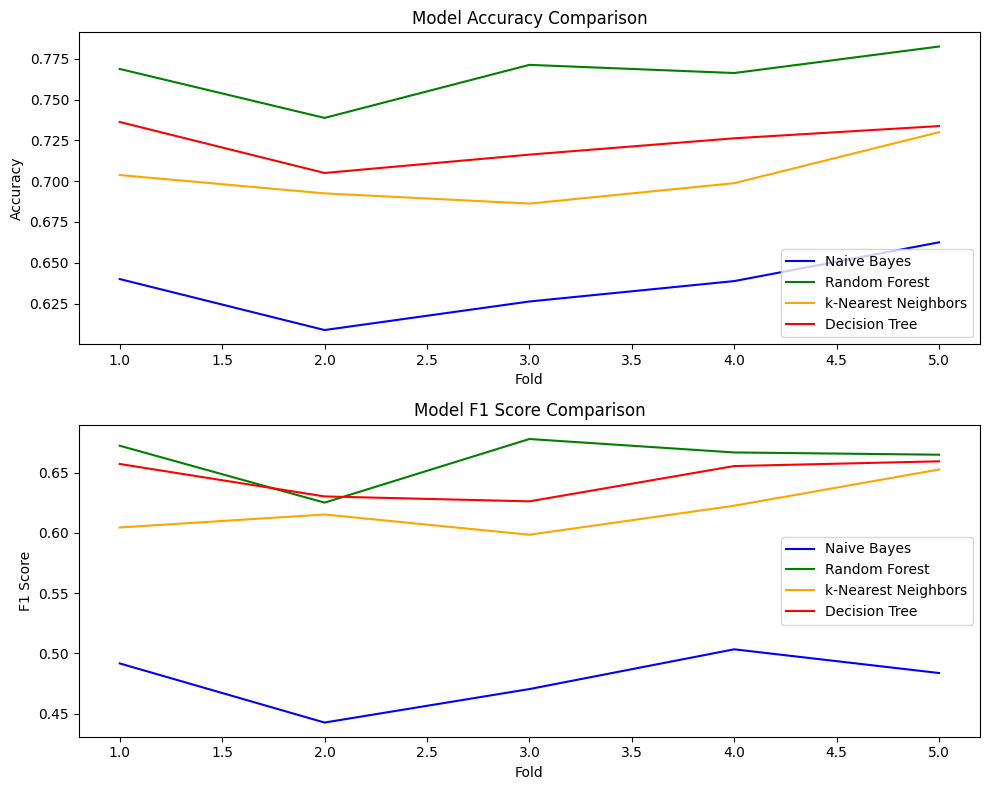


Best Model based on Mean Accuracy: Random Forest
Second Best Model based on Mean Accuracy: Decision Tree


In [25]:
accuracies = []
f1_results = []

models = [nb_model, rf_model, knn_model, dt_model]
model_names = ['Naive Bayes', 'Random Forest', 'k-Nearest Neighbors', 'Decision Tree']

for model, name in zip(models, model_names):
    kfold = KFold(n_splits=5, shuffle=True, random_state=42)
    scores = cross_val_score(model, X, y, cv=kfold, scoring='accuracy')
    f1_scores = cross_val_score(model, X, y, cv=kfold, scoring='f1_macro')

    accuracies.append(scores)
    f1_results.append(f1_scores)

    print(f"\n{name} Cross-Validation Scores:")
    print("Mean Accuracy:", np.mean(scores))
    print("Standard Deviation (Accuracy):", np.std(scores))
    print("Mean F1 Score:", np.mean(f1_scores))
    print("Standard Deviation (F1 Score):", np.std(f1_scores))

    # Confusion Matrix
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    print("\nConfusion Matrix:")
    print(cm)

# Plotting accuracies and f1-scores
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 8))
colors = ['blue', 'green', 'orange', 'red']

for i, (result, name, color) in enumerate(zip(accuracies, model_names, colors)):
    axes[0].plot(range(1, 6), result, label=f'{name}', color=color)

axes[0].set_title('Model Accuracy Comparison')
axes[0].set_xlabel('Fold')
axes[0].set_ylabel('Accuracy')
axes[0].legend()

# F1 Score plot
for i, (result, name, color) in enumerate(zip(f1_results, model_names, colors)):
    axes[1].plot(range(1, 6), result, label=f'{name}', color=color)

axes[1].set_title('Model F1 Score Comparison')
axes[1].set_xlabel('Fold')
axes[1].set_ylabel('F1 Score')
axes[1].legend()

plt.tight_layout()
plt.show()


# Finding the best and second-best models based on mean accuracy
mean_accuracies = [np.mean(scores) for scores in accuracies]
sorted_indices = np.argsort(mean_accuracies)[::-1]

best_model_index = sorted_indices[0]
second_best_model_index = sorted_indices[1]

best_model = models[best_model_index]
second_best_model = models[second_best_model_index]

best_model_name = model_names[best_model_index]
second_best_model_name = model_names[second_best_model_index]

print(f"\nBest Model based on Mean Accuracy: {best_model_name}")
print(f"Second Best Model based on Mean Accuracy: {second_best_model_name}")




### 5. Picking two favorite models

In [28]:
# Feature importance - Permutation Feature Importance:

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
from sklearn.inspection import permutation_importance
import seaborn as sns
import matplotlib.pyplot as plt


# Calculate permutation feature weighting
def permutation_feature_importance(model, X, y, metric, n_permutations=100):
    baseline_score = metric(y, model.predict(X))
    importance_scores = []

    for feature in X.columns:
        temp_X = X.copy()
        temp_X[feature] = np.random.permutation(temp_X[feature].values)
        permuted_score = metric(y, model.predict(temp_X))
        importance_scores.append(baseline_score - permuted_score)

    return np.array(importance_scores)



importance_scores = permutation_feature_importance(best_model, X_test, y_test, accuracy_score)
importance_scores2 = permutation_feature_importance(second_best_model, X_test, y_test, accuracy_score)

# importance calculation
feature_importance_df = pd.DataFrame({"Feature": X.columns, "Importance": importance_scores})
feature_importance_df = feature_importance_df.sort_values(by="Importance", ascending=False)

print("Permutation importance of features", feature_importance_df)


feature_importance_df2 = pd.DataFrame({"Feature": X.columns, "Importance": importance_scores2})
feature_importance_df = feature_importance_df2.sort_values(by="Importance", ascending=False)

print("Permutation importance of features", feature_importance_df2)


Permutation importance of features                                    Feature  Importance
16     Curricular units 2nd sem (approved)     0.11000
11     Curricular units 1st sem (approved)     0.06750
5                  Tuition fees up to date     0.03125
6                       Scholarship holder     0.00750
17        Curricular units 2nd sem (grade)     0.00375
26                             Course_9119     0.00250
9      Curricular units 1st sem (enrolled)     0.00250
10  Curricular units 1st sem (evaluations)     0.00250
0                        Application order     0.00125
14     Curricular units 2nd sem (enrolled)     0.00125
35                             Course_9853     0.00125
33                             Course_9670     0.00125
29                             Course_9238     0.00125
15  Curricular units 2nd sem (evaluations)     0.00125
18                       Unemployment rate     0.00125
13     Curricular units 2nd sem (credited)     0.00125
12        Curricular units 1st

Most relevant features were:
- Curricular units 2nd sem (approved)     0.11000
- Curricular units 1st sem (approved)     0.06750
- Tuition fees up to date     0.03125
- Scholarship holder     0.00750

### 6. Saving our favorite model as ONNX-file

In [27]:
!pip install skl2onnx
!pip install onnxruntime

import skl2onnx
import onnxruntime
from skl2onnx import convert_sklearn

# Convert the model to ONNX format
initial_type = [('float_input', skl2onnx.common.data_types.FloatTensorType([None, X_train.shape[1]]))]
onnx_model = convert_sklearn(best_model, initial_types=initial_type, target_opset=18)

# Save the ONNX model to a file
onnx_file_path = "best_model.onnx"
with open(onnx_file_path, "wb") as f:
    f.write(onnx_model.SerializeToString())

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.7/294.7 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.7/15.7 MB 75.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.5/84.5 kB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 62.3 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.20.3
    Uninstalling protobuf-3.20.3:
      Successfully uninstalled protobuf-3.20.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.14.0 requires protobuf!=4.21.0,!=4.21.1,!=4.21.2,!=4.21.3,!=4.21.4,!=4.21.5,<5.0.0dev,>=3.20.3, but you have protobuf 3.20.2 which is incompatible.
tensorflow-metadata 1.14.0 requires protobuf<4.21,>=3.20.3, but you have protobuf 3.20.2 which is incompatible.


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.4/6.4 MB 42.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 10.3 MB/s eta 0:00:00


Discussion:
- Accuracy and F1 Score: Random Forest has the highest mean accuracy (0.7655) and mean F1 score (0.66135) among the models, indicating that it performs the best in terms of overall classification accuracy and balance between precision and recall.
- Consistency: Random Forest also has the lowest standard deviations for both accuracy and F1 score, suggesting that it provides consistent and stable results across cross-validation folds.
- Naive Bayes: While Naive Bayes has a lower accuracy and F1 score compared to Random Forest, it still provides reasonable performance. However, it has the highest standard deviation, indicating less consistency.
- k-Nearest Neighbors: k-NN falls between Naive Bayes and Decision Tree in terms of performance. It offers moderate accuracy and F1 score, with moderate consistency.
- Decision Tree: Decision Tree has competitive performance but slightly lower than Random Forest. It is more consistent than Naive Bayes but less consistent than Random Forest.
- Confusion Matrices: The confusion matrices provide insights into the types of errors each model is making. This information can be valuable for fine-tuning the models or making decisions based on specific requirements.


In conclusion, Random Forest appears to be the most promising model for this classification task based on the provided metrics. However, the choice of the best model also depends on the specific goals and requirements of the application, and further analysis or hyperparameter tuning may be needed to make a final decision.